# Monte Carlo Estimation of Pi

In this notebook, we will use the Monte Carlo Method to estimate Pi. 

We can imagine a square which encloses a quadrant of a circle. We can then simulate placing random points (x, y) inside of this square, where $x^2 + y^2 \le 1$. We can then count the number of points that fall inside the circle, and calculate the ratio of points inside to the number of total points, as. This ratio should approach $\frac{\pi}{4}$. We can then multiply the ratio by 4 and get the following equation.

$$\pi = 4 \times \frac{Points Inside}{Total Points}$$

### Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We begin with making a function that generates random (x, y) and assessing whether the point is inside the circle, or if $ x^2 + y^2 \le 1$. From there, we can calculate $\pi$ using the above equation. 

To check if (x, y) is in the circle, we only need to calculate $ x^2 + y^2$ in comparing the distance to the radius due to the following reasoning:

$$ D \le R$$
$$ D^2 \le R^2 $$
$$ x^2 + y^2 \le 1^2 $$
$$ x^2 + y^2 \le 1 $$

Where $ D = \sqrt{x^2 + y^2}$ and $R = 1$. Using this simplified calculation is more computationally efficient. 

In [62]:
def estimate_pi(num_points):
  """"
    Estimates the value of pu using the Monte Carlo method
    
    Args:
      num_points: Total number of random points to generate
      
    Returns:
      pi_estimate: Estimated value of pi
  """    
  # Generate all random points (x, y)
  x = np.random.uniform(0, 1, num_points)
  y = np.random.uniform(0, 1, num_points)  
   
  # Count how many points are <= 1, calculating distances of points from origin
  points_inside = np.sum(x**2 + y**2 <= 1)
    
  # Calculate the estimate of pi
  pi_estimate = 4 * (points_inside / num_points)
  
  return pi_estimate


We can then use the above function to estimate $\pi$ for any given amount of points/iterations. 

In [ ]:
num_points = 100000
pi_estimate = estimate_pi(num_points)
error = (np.abs(pi_estimate - np.pi) / np.pi) * 100

print(f"Estimate of pi: {pi_estimate:.6f}\nPi: {np.pi:.6f}\nError: {error:.6f}")

Estimate of pi: 3.133920
Pi: 3.141593
Error: 0.244228


Below is a function that plots the points to visualise whether they are in the circle or not. 

In [60]:
def get_plot_data(num_points):
  # Generate all random points (x, y)
  x = np.random.uniform(0, 1, num_points)
  y = np.random.uniform(0, 1, num_points)  
  
  # Calculate distances for all points
  distances = x**2 + y**2
  
  # Count how many points are <= 1
  points_inside = np.sum(distances <= 1)
    
  # Calculate the estimate of pi
  pi_estimate = 4 * (points_inside / num_points)
  
  return pi_estimate, distances, x, y
  

def visualise_pi_estimation(num_points):
  # Limit the number of points so user doesn't crash function
  if num_points > 100000:
    print("Reducing points to 100,000 for plotting speed")
    num_points = 100000
    
  # Get estimate, distances and values
  pi_estimate, distances, x, y = get_plot_data(num_points)
  
  # Check distances
  inside = distances <= 1
  
  # Create plot
  plt.figure(figsize = (6, 6))
  plt.scatter(x[inside], y[inside], color = 'blue', s = 1, label = 'Inside')
  plt.scatter(x[~inside], y[~inside], color = 'red', s = 1, label = 'Outside')
  
  # Draw the circle boundary
  circle_x = np.linspace(0, 1, 100)
  circle_y = np.sqrt(1 - circle_x**2)
  plt.plot(circle_x, circle_y, color = 'black', linewidth = 2)
  
  plt.title(f"Points: {num_points} | Pi Estimate: {pi_estimate:.4f}")
  plt.legend()
  plt.show()
  

Reducing points to 100,000 for plotting speed


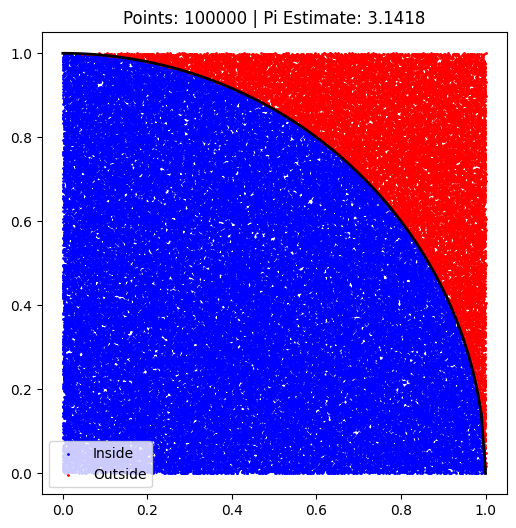

In [61]:
num_points = 1000000
visualise_pi_estimation(num_points)

Below is a function to estimate pi when doing a large amount of iterations. We use chunking for memory management for large-scale Monte Carlo estimations. 

In [ ]:
def estimate_pi_chunked(num_points, chunk_size = 100*7):
  """
    Estimates pu using Monte Carlo with memory management through chunking
    
     Args:
      num_points: Total number of random points to generate
      chunk_size: How many points to process in RAM at once
      
    Returns:
      pi_estimate: Estimated value of pi 
  """
  points_inside = 0
  
  # Calculate how many full chunks and remaining points
  num_chunks = num_points // chunk_size
  remainder = num_points % chunk_size
  
  # Process chunks
  for i in range(num_chunks):
    x = np.random.uniform(0, 1, chunk_size)
    y = np.random.uniform(0, 1, chunk_size)
    
    points_inside += np.sum(x**2 + y**2 <= 1)
    
    # Print progress of chunking
    # if (i + 1) % 10 == 0:
    #   print(f"Processed {(i + 1) * chunk_size} points...")
      
      
  # Process leftover points
  if remainder > 0:
    x = np.random.uniform(0, 1, remainder)
    y = np.random.uniform(0, 1, remainder)
    
    points_inside += np.sum(x**2 + y**2 <= 1)
    
  pi_estimate = 4 * (points_inside / num_points)
  
  return pi_estimate

In [ ]:
num_points = 1000000000
pi_estimate = estimate_pi_chunked(num_points)
error = (np.abs(pi_estimate - np.pi) / np.pi) * 100

print(f"Estimate of pi: {pi_estimate:.6f}\nPi: {np.pi:.6f}\nError: {error:.6f}")

### Error
As $N \to \infty$, the errors in estimating pi generally decreases proprotional to $\frac{1}{\sqrt{N}}$, where $N = number\,of\,tests$. We can test this through the following code. We can also plot how $\pi_{estimate} \to \pi$ as $N \to \infty$.